<a href="https://colab.research.google.com/github/RahulJuluru2/unit2assignments/blob/main/U2W9_13_Yes_No_Classifier_Speech_A_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to :

* obtain the mfcc features from audio samples 
* train the classifier with these mfcc features
* classify the audio samples into 'yes' and 'no'

In [1]:
#@title Experiment Walkthrough Video

from IPython.display import HTML

HTML("""<video width="840" height="480" controls>
<source src="https://cdn.exec.talentsprint.com/content/yes_no_classifier.mp4" type="video/mp4">
</video>""")

## Dataset 

### Description
The dataset used in the experiment contains 2661 audio samples with the extension .wav. 

Each audio sample has utterances 'yes' or 'no'

The naming convention of the sample is of the format 'yes_no/' followed by '10' (representing 'yes') or '11' (representing 'no')

Ex:   

        'yes_no/10_g38_46.wav'    ---> yes audio sample
        'yes_no/11_G6_11.wav'     ---> no audio sample



## Domain Information

When we listen to an audio sample it changes constantly. This means that speech is non-stationary signal. Therefore, normal signal processing techniques cannot be applied to get features from audio. However, if the speech signal is observed using a very small duration window, the speech content in that small duration appears to be  stationary. That brought in the concept of short-time processing of speech. 

MFCC is a techique for short-time processing of speech. 

**Note: While it is a bonus to understand 'how' a speech signal is converted to a 'representation' by MFCC (or other similar speech processing techniques), it is not mandatory to understand the same. It is sufficient to realize that you're generating a unique numeric representation (a set of numbers) of a speech signal and that this unique representation helps you run your machine learning algorithms over the samples.**

## AIML Technique

In this short-time processing technique MFCC, a small duration window (say 25 milli sec) is considered for processing of the audio samples at a time. This small duration is called a frame. Now, for each of the frames, MFCC features are computed which give a compact representation of the audio samples. A spectogram is computed for audio samples which gives a heat map of frequencies vs time from the series of spectral vectors generated from audio samples.

This representation is obtained by keeping in mind that humans are much better at grasping small changes in the audio at low frequencies than audio at high frequencies. So mel-scale converts high frequencies to human graspable frequencies. 

## Setup Steps

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}

In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U2W9_13_Yes_No_Classifier_Speech_A" #name of the notebook

def setup(): 
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/yes_no.zip")
    ipython.magic("sx unzip yes_no.zip")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing Required Packages

In [5]:
import numpy as np
import librosa

# Visualization
import matplotlib.pyplot as plt
import librosa.display

# Import glob to perform pattern matching to find files
import glob

# Import train_test_split to split the data into train and test sets
from sklearn.model_selection import train_test_split

# Import MLPClassifier to be trained on features of wav files
from sklearn.neural_network import MLPClassifier

#### About glob.iglob:

The glob library  provides methods for traversing the file system and returning files that matched a defined set of glob patterns. Here it helps traverse file name matching the ".wav" pattern

**Note:** Refer to  [glob.iglob](https://docs.python.org/3/library/glob.html)

In [6]:
labels = []
wave_files = []
for filename in glob.iglob('yes_no/*.wav', recursive=True):
  # Store the labels of each wav file in a list
  labels.append(int((filename.split("/")[-1]).split("_")[0])) # split the file name to get the labels of the audio files
  # Store the wav files in a list
  wave_files.append(filename)

In [7]:
# Check the length of wav files
len(wave_files)

2661

### Mel Spectrogram

Human ears tend to listen to sounds on the log scale. That means, at lower frequencies we can detect small changes, but at higher frequencies our ears become less sensitive to small changes. For example, the difference between 10 Hz and 20 Hz would sound almost the same to us as that between 1000 Hz and 2000 Hz. 

Let us compute the Mel Spectrogram features using a convenient function in the `librosa` library in Python:

Below is the function for loading the wavefile and extracting the melspectogram features at a sample rate

* Refer to [librosa.load](http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.core.load.html)

* Refer to [librosa.feature.melspectrogram](https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html)

In [8]:
def get_melspectrogram_features(filename):
    y, sr = librosa.load(filename)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    # The log of the spectrogram is a better parameter to observe rather than the spectrogram itself.
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S,sr

Let us try to extract the features for one of the wave file and plot the melspectrogram 

**Note:** Refer to [librosa.display.specshow](https://librosa.org/doc/latest/generated/librosa.display.specshow.html)


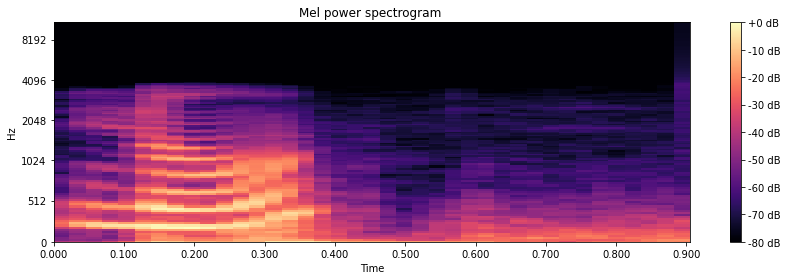

In [9]:
features,sr = get_melspectrogram_features(wave_files[0])
plt.figure(figsize=(12, 4))
librosa.display.specshow(features, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [10]:
# Play the audio from wave file
import IPython.display as ipd
ipd.Audio(wave_files[0]) 

### Extract the MFCC features for all Audio files


* Refer to [librosa.load](http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.core.load.html)


*   Refer to [librosa.feature.mfcc](https://librosa.org/doc/0.7.2/generated/librosa.feature.mfcc.html)  

In [11]:
n_mfcc = 30  # mfcc features

Since our ear cannot response to very fast change of speech data, we normally cut the speech data into frames before analysis.

In [12]:
# Extract MFCC features 

def get_mfcc_features(filename, sr=7000):
    frames = 15          # Get the MFCC features with frame size 15  
    # Load the audio files with the sampling rate 7000.
    y, sr = librosa.load(filename, sr=sr)
    features = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=30)
    # We need to split the signal into short-time frames as the frequencies in a signal change over time.
    # So in most cases we don't do the Fourier transform across the entire signal.
    if features.shape[1] < frames :
        features = np.hstack((features, np.zeros((n_mfcc, frames - features.shape[1]))))
    elif features.shape[1] > frames:
        features = features[:, :frames]
    return features

### Extracting mfcc features for all the samples

In [14]:
features = []                  # It takes some time to run this cell
for filename in wave_files:
    fea = get_mfcc_features(filename) # YOUR CODE HERE: To call the get_mfcc_features with the filename
    features.append(fea)

In [15]:
# Check the shape of the features
features[0].shape

(30, 15)

### Split the mfcc features into train and test sets with 80-20 split 

In [21]:
# YOUR CODE HERE: Split MFCC features to train and test with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

Get the length of the train and test data

In [22]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2128, 533, 2128, 533)

In [23]:
# Convert the X_train to an array and reshape from 2128*30*15 to 2128*450

X_train = np.array(X_train)
X_train = X_train.reshape((2128,450)) # YOUR CODE HERE: Flatten the array by reshaping

# Convert the X_test to an array and reshape from 533*30*15 to 533*450
X_test = np.array(X_test)
X_test = X_test.reshape((533,450)) # YOUR CODE HERE: Flatten the array by reshaping

In [24]:
# Get the shape of X_train, X_test
X_train.shape, X_test.shape

((2128, 450), (533, 450))

### Apply MLP classifier on the MFCC features

**Note:** Refer to [MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from sklearn

In [26]:
# Create a object for MLPClassifier 
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(100,50), random_state=1, solver='adam')

# YOUR CODE HERE: Fit the features and labels to MLP Classifier
clf.fit(X_train,y_train)

# YOUR CODE HERE: Get the predicted values on test data
predicted_values = clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
# YOUR CODE HERE: To calculate the accuracy by comparing predicted and test labels
print("the final accuracy score is {0}".format(accuracy_score(predicted_values,y_test)))

the final accuracy score is 0.8799249530956847


### Please answer the questions below to complete the experiment:

In [29]:
#@title 'Sampling rate' of the audio file is one of the input parameters of the MLPClassifier (of SKlearn) that is used above? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE","FALSE"]


In [30]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [31]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [32]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [33]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [34]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [35]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1470
Date of submission:  10 Jul 2022
Time of submission:  18:48:59
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
